In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

custom_date_parser = lambda x: pd.to_datetime(x, format='%B/%Y', errors='coerce')

df = pd.read_csv("inmateDB.csv")
print(df.info())
df.head(5)

/scratch/9794865.1.csgpu/ipykernel_1420023/834813136.py:7: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("inmateDB.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78003 entries, 0 to 78002
Data columns (total 37 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   ID NUMBER                                    78003 non-null  int64  
 1   COMMITTED LAST NAME                          78002 non-null  object 
 2   FIRST NAME                                   78002 non-null  object 
 3   MIDDLE NAME                                  58304 non-null  object 
 4   NAME EXTENSION                               78003 non-null  object 
 5   LEGAL LAST NAME                              1091 non-null   object 
 6   FIRST NAME.1                                 1091 non-null   object 
 7   MIDDLE NAME.1                                1091 non-null   object 
 8   NAME EXTENSION.1                             1091 non-null   object 
 9   DATE OF BIRTH                                77989 non-null  object 
 10

,ID NUMBER,COMMITTED LAST NAME,FIRST NAME,MIDDLE NAME,NAME EXTENSION,LEGAL LAST NAME,FIRST NAME.1,MIDDLE NAME.1,NAME EXTENSION.1,DATE OF BIRTH,...,EARLIEST POSSIBLE RELEASE DATE,GOOD TIME LAW,CURRENT STATUS,INST RELEASE DATE,INST RELEASE TYPE,PAROLE BOARD NEXT REVIEW DATE(MONTH&YEAR),PAROLE BOARD FINAL HEARING DATE(MONTH&YEAR),PAROLE BOARD STATUS,PAROLE RELEASE DATE,PAROLE DISCHARGE DESC
0,1702,CLIFFORD,BRADLEY,NaN,,NaN,NaN,NaN,NaN,NaN,...,NaN,,DISCHARGE,1/6/1986,MANDATORY DISCHARGE,NaN,NaN,NaN,NaN,NaN
1,6145,KANE,THOMAS,NaN,,NaN,NaN,NaN,NaN,12/21/1928,...,NaN,2926,ESCAPE,8/31/1952,ESCAPE,NaN,NaN,NaN,NaN,
2,6452,ATKINS,LARRY,NaN,,NaN,NaN,NaN,NaN,7/26/1929,...,NaN,,DISCHARGE,7/20/1955,DISCRETIONARY PAROLE,NaN,NaN,PAROLED,12/9/1980,EARLY DISCHARGE BY PAROLE BRD
3,12444,SHANEYFELT,CHARLEY,NaN,,NaN,NaN,NaN,NaN,4/10/1905,...,NaN,,DISCHARGE,12/24/1987,MANDATORY DISCHARGE,NaN,NaN,NaN,NaN,
4,15379,BEADES,JOE,NaN,,NaN,NaN,NaN,NaN,10/12/1924,...,LFE,2926,DISCHARGE,7/19/1989,DISCRETIONARY PAROLE,NaN,NaN,PAROLED,1/17/1993,EARLY DISCHARGE BY PAROLE BRD


In [4]:
df_offences = pd.read_csv("offences.csv")
print(df_offences.info())
df_offences['COUNTY COMMITTED'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141437 entries, 0 to 141436
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   ID NUMBER                     141437 non-null  int64  
 1   OFFENSE MINIMUM YEAR OR TERM  141437 non-null  object 
 2   MINIMUM MONTH                 140943 non-null  float64
 3   MINIMUM DAY                   140943 non-null  float64
 4   OFFENSE MAXIMUM YEAR OR TERM  141437 non-null  object 
 5   MAXIMUM MONTH                 140698 non-null  float64
 6   MAXIMUM DAY                   140698 non-null  float64
 7   OFFENSE MAN MIN YEAR OR TERM  141437 non-null  int64  
 8   MAN MIN MONTH                 141437 non-null  int64  
 9   MAN MIN DAY                   141437 non-null  int64  
 10  OFFENSE ARREST DESC           141437 non-null  object 
 11  FELONY MSDMNR CODE            141437 non-null  object 
 12  FELONY MSDMNR DESC            141437 non-nul

DOUGLAS                           46234
LANCASTER                         21821
HALL                               7557
SARPY                              6787
MADISON                            5072
                                  ...  
KEYA PAHA                             7
THOMAS                                6
ARTHUR                                5
LOUP                                  4
MCPHERSON                             2
Name: COUNTY COMMITTED, Length: 95, dtype: int64

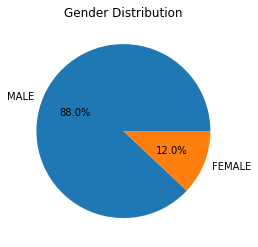

In [2]:
gender_counts = df['GENDER'].value_counts()

# Generate the pie chart
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%')

# Set the chart title
plt.title('Gender Distribution')

# Display the chart
plt.show()

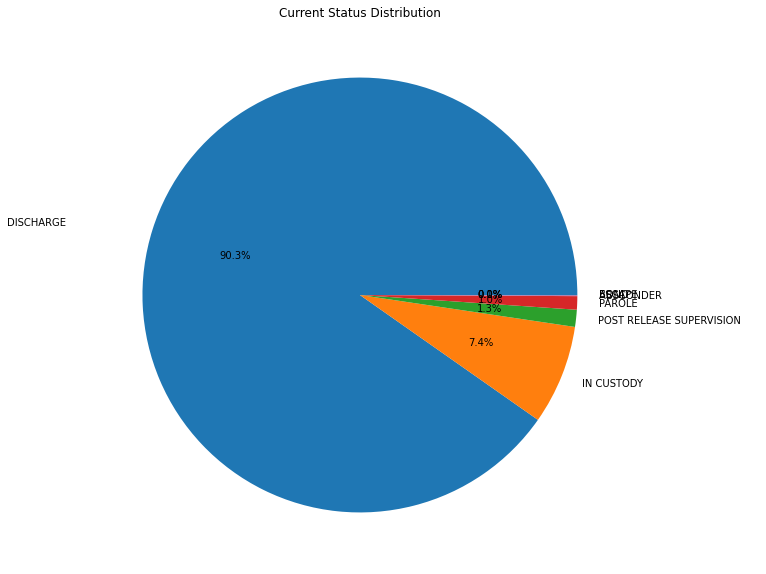

In [3]:
curr_stat_count = df['CURRENT STATUS'].value_counts()

# Generate the pie chart
plt.figure(figsize=(10, 10))
plt.pie(curr_stat_count.values, labels=curr_stat_count.index, autopct='%1.1f%%')

# Set the chart title
plt.title('Current Status Distribution')

# Display the chart
plt.show()

WHITE                             45732
BLACK                             18952
HISPANIC                           8700
NATIVE AMERICAN                    3669
ASIAN                               428
OTHER                               425
                                     71
PACIFIC ISLANDER                     25
HAWAIIAN ISLANDER                     1
Name: RACE DESC, dtype: int64


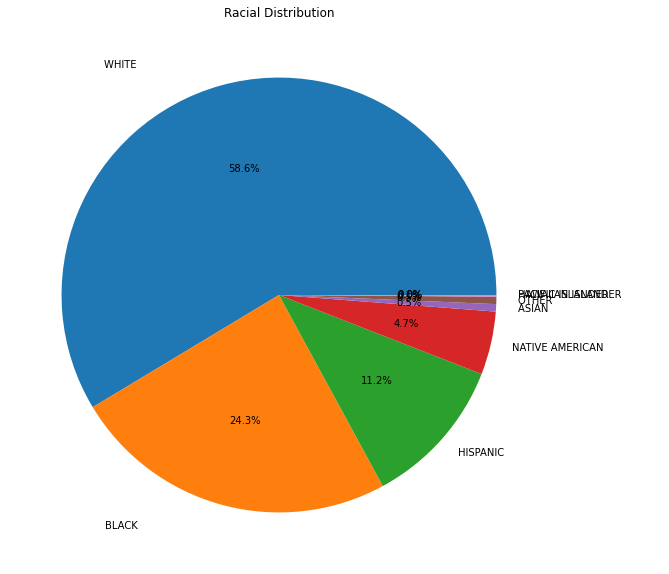

In [4]:
race_counts = df['RACE DESC'].value_counts()
print(race_counts)
# Generate the pie chart
plt.figure(figsize=(10, 10))
plt.pie(race_counts.values, labels=race_counts.index, autopct='%1.1f%%')

# Set the chart title
plt.title('Racial Distribution')

# Display the chart
plt.show()

WHITE                             2802
BLACK                             1672
HISPANIC                           881
NATIVE AMERICAN                    288
OTHER                               59
ASIAN                               46
                                    10
PACIFIC ISLANDER                     6
Name: RACE DESC, dtype: int64


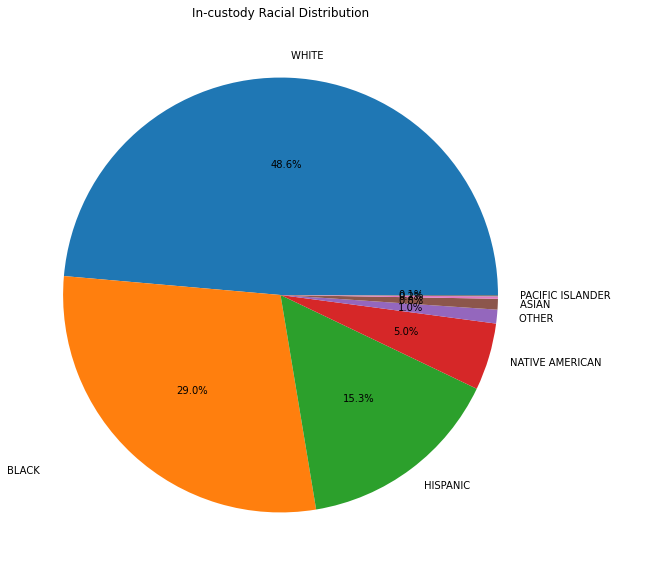

In [5]:
curr_race_df = df[df['CURRENT STATUS']=='IN CUSTODY']
curr_race_counts = curr_race_df['RACE DESC'].value_counts()
print(curr_race_counts)
# Generate the pie chart
plt.figure(figsize=(10, 10))
plt.pie(curr_race_counts.values, labels=curr_race_counts.index, autopct='%1.1f%%')

# Set the chart title
plt.title('In-custody Racial Distribution')

# Display the chart
plt.show()

NEBRASKA STATE PENITENTIARY       4404
COMMUNITY CORRECTIONS-LINCOLN     2657
RECEPTION & TREATMENT CENTER      1862
OMAHA CORRECTIONAL CENTER         1742
WORK ETHIC CAMP                   1385
TECUMSEH STATE COR INSTITUTION    1241
NEBRASKA CORR CENTER FOR WOMEN     991
COMMUNITY CORRECTIONS-OMAHA        811
DIAGNOSTIC & EVALUATION CENTER     455
LINCOLN CORRECTIONAL CENTER        245
NEBRASKA CORR YOUTH FACILTY        136
HASTINGS CORRECTIONAL CENTER        25
Name: FACILITY, dtype: int64


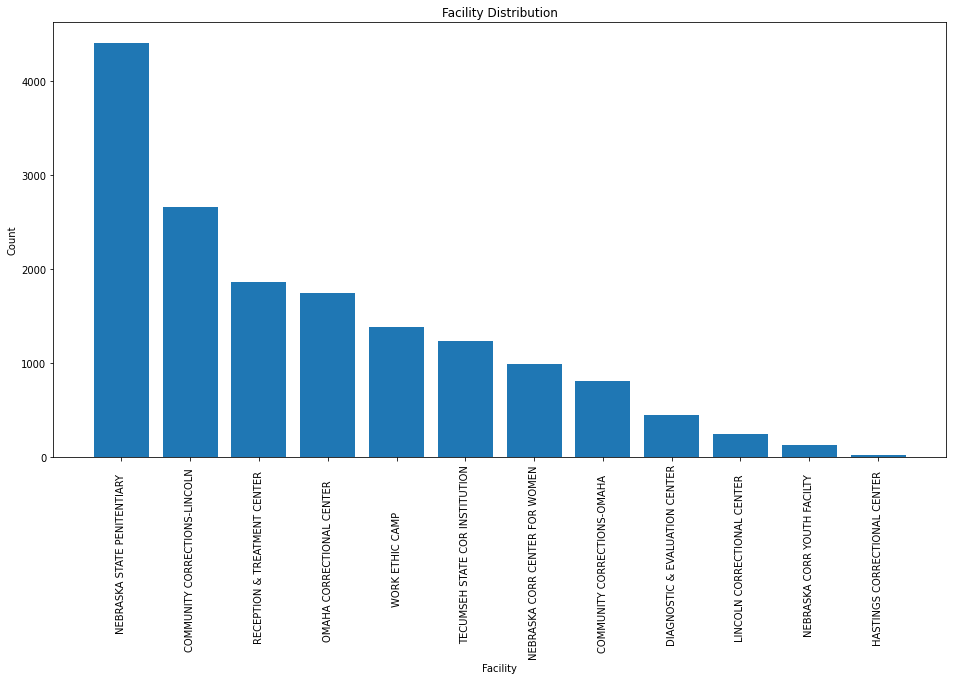

In [6]:
facility_counts = df['FACILITY'].value_counts()
print(facility_counts)
plt.figure(figsize=(16, 8))
plt.bar(facility_counts.index, facility_counts.values)

# Set the chart title and labels
plt.title('Facility Distribution')
plt.xlabel('Facility')
plt.ylabel('Count')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the chart
plt.show()

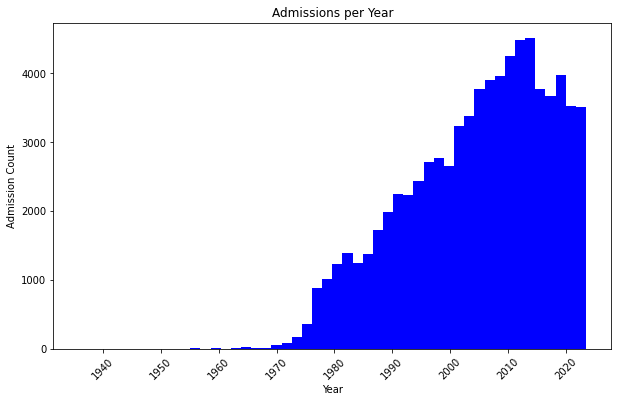

In [7]:
#Assuming sentence begin date to be the date of admission
sentence_date_vc = df['SENTENCE BEGIN DATE'].value_counts()
df['SENTENCE BEGIN DATE'] = pd.to_datetime(df['SENTENCE BEGIN DATE'], format='%m/%d/%Y')

plt.figure(figsize=(10, 6))
plt.hist(df['SENTENCE BEGIN DATE'], bins=50, color='blue')
plt.xlabel('Year')
plt.ylabel('Admission Count')
plt.title('Admissions per Year')
plt.xticks(rotation=45)
plt.show()

In [8]:
locations_df = pd.read_csv('Nebraska_loc.csv',usecols=['facility_name', 'street_address', 'lat_long'])
pattern = r"\[([\d.-]+),\s+([\d.-]+)\]"
locations_df[['latitude', 'longitude']] = locations_df['lat_long'].str.extract(pattern).astype(float)

# Drop the original 'lat_long' column if needed
locations_df.drop(columns=['lat_long'], inplace=True)

locations_df = locations_df.dropna()
print(locations_df)

                     facility_name                         street_address  \
0      NEBRASKA STATE PENITENTIARY      4201 S 14th St, Lincoln, NE 68502   
1    COMMUNITY CORRECTIONS-LINCOLN  2720 W Van Dorn St, Lincoln, NE 68522   
2     RECEPTION & TREATMENT CENTER  3218 W Van Dorn St, Lincoln, NE 68522   
3   DIAGNOSTIC & EVALUATION CENTER  2620 W Van Dorn St, Lincoln, NE 68522   
4      LINCOLN CORRECTIONAL CENTER  3216 W Van Dorn St, Lincoln, NE 68522   
5        OMAHA CORRECTIONAL CENTER            2323 Ave J, Omaha, NE 68110   
6                  WORK ETHIC CAMP           2309 US-83, McCook, NE 69001   
7   TECUMSEH STATE COR INSTITUTION         2725 NE-50, Tecumseh, NE 68450   
8   NEBRASKA CORR CENTER FOR WOMEN       1107 Recharge Rd, York, NE 68467   
9      COMMUNITY CORRECTIONS-OMAHA            2320 Ave J, Omaha, NE 68110   
10     NEBRASKA CORR YOUTH FACILTY      2610 N 20th St E, Omaha, NE 68110   

     latitude   longitude  
0   40.770334  -96.704313  
1   40.785690  -96.

## Facility County Info

In [9]:
!pip install geopandas fiona pyproj shapely

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/share/pkg.7/python3/3.8.10/install/bin/python3.8 -m pip install --upgrade pip' command.


In [10]:
import geopandas as gpd
from shapely.geometry import Point
import pyproj

In [11]:
county_gdf = gpd.read_file('county_boundaries/BND_CountyBoundary_DOT.shp')
county_gdf.head(5)

,OBJECTID,Cnty_Name,Cnty_No,CountyFIPS,GlobalID,Shape_Leng,Shape_Area,geometry
0,1,Adams,1,001,{16352331-3262-4EBB-A789-263D6FDBEBB3},201309.133514,2.531755e+09,"POLYGON ((-10940269.029 4967940.346, -10940274..."
1,2,Antelope,2,003,{FA9D8609-F002-4003-AF46-CE1F04A2B936},260687.146674,4.052250e+09,"POLYGON ((-10890881.012 5226775.163, -10890884..."
2,3,Arthur,3,005,{FF27D2CA-CA67-4D69-8720-0EF86DB743E5},232240.911440,3.326494e+09,"POLYGON ((-11352964.817 5122449.661, -11351376..."
3,4,Banner,4,007,{85111E3B-7990-4C93-A22A-5941EBEC0EBF},242685.872443,3.451999e+09,"POLYGON ((-11583096.400 5115840.405, -11582162..."
4,5,Blaine,5,009,{AA433830-4A29-4E78-8410-A51CD16A1136},232721.194810,3.342160e+09,"POLYGON ((-11097092.398 5173900.886, -11097107..."


In [12]:
# Define the source and target coordinate reference systems
source_crs = 'EPSG:4326'  # WGS 84
target_crs = 'EPSG:3857'  # Web Mercator

# Assuming you have a DataFrame 'locations_df' with 'latitude' and 'longitude' columns
# Convert latitude-longitude pairs to Point geometry
geometry = [Point(xy) for xy in zip(locations_df['longitude'], locations_df['latitude'])]
locations_gdf = gpd.GeoDataFrame(locations_df, geometry=geometry, crs=source_crs)

# Create a coordinate transformation object from source_crs to target_crs
transformer = pyproj.Transformer.from_crs(source_crs, target_crs, always_xy=True)

# Apply the coordinate transformation to the geometry of locations_gdf
locations_gdf['geometry'] = locations_gdf['geometry'].apply(lambda geom: Point(transformer.transform(geom.x, geom.y)))

In [13]:
# Assuming a DataFrame 'locations_df' with 'latitude' and 'longitude' columns
# Convert latitude-longitude pairs to Point geometry

result_gdf = gpd.sjoin(locations_gdf, county_gdf, how='left', op='within')

result_gdf

<ipython-input-13-6d9036ff0347>:4: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:3857

  result_gdf = gpd.sjoin(locations_gdf, county_gdf, how='left', op='within')


,facility_name,street_address,latitude,longitude,geometry,index_right,OBJECTID,Cnty_Name,Cnty_No,CountyFIPS,GlobalID,Shape_Leng,Shape_Area
0,NEBRASKA STATE PENITENTIARY,"4201 S 14th St, Lincoln, NE 68502",40.770334,-96.704313,POINT (-10765074.828 4978524.822),54,55,Lancaster,55,109,{1715F139-F986-449B-86E5-EB3FF1540CD5},253615.311297,3.827471e+09
1,COMMUNITY CORRECTIONS-LINCOLN,"2720 W Van Dorn St, Lincoln, NE 68522",40.785690,-96.760379,POINT (-10771316.102 4980782.250),54,55,Lancaster,55,109,{1715F139-F986-449B-86E5-EB3FF1540CD5},253615.311297,3.827471e+09
2,RECEPTION & TREATMENT CENTER,"3218 W Van Dorn St, Lincoln, NE 68522",40.787163,-96.766593,POINT (-10772007.835 4980998.783),54,55,Lancaster,55,109,{1715F139-F986-449B-86E5-EB3FF1540CD5},253615.311297,3.827471e+09
3,DIAGNOSTIC & EVALUATION CENTER,"2620 W Van Dorn St, Lincoln, NE 68522",40.785611,-96.760382,POINT (-10771316.453 4980770.615),54,55,Lancaster,55,109,{1715F139-F986-449B-86E5-EB3FF1540CD5},253615.311297,3.827471e+09
4,LINCOLN CORRECTIONAL CENTER,"3216 W Van Dorn St, Lincoln, NE 68522",40.787795,-96.766023,POINT (-10771944.427 4981091.702),54,55,Lancaster,55,109,{1715F139-F986-449B-86E5-EB3FF1540CD5},253615.311297,3.827471e+09
5,OMAHA CORRECTIONAL CENTER,"2323 Ave J, Omaha, NE 68110",41.283310,-95.897379,POINT (-10675247.435 5054220.084),27,28,Douglas,28,055,{53AF5084-CFA4-421F-AB88-989DB2F2B937},195322.474003,1.558166e+09
6,WORK ETHIC CAMP,"2309 US-83, McCook, NE 69001",40.228619,-100.647318,POINT (-11204008.212 4899220.470),72,73,Red Willow,73,145,{5AEB4DBB-3074-485B-95E9-7F65CEA0B47E},226710.667491,3.188412e+09
7,TECUMSEH STATE COR INSTITUTION,"2725 NE-50, Tecumseh, NE 68450",40.420347,-96.170889,POINT (-10705694.374 4927215.343),48,49,Johnson,49,097,{0DB67C8A-80F7-4131-9AED-A8C56E8DA450},164748.799260,1.684023e+09
8,NEBRASKA CORR CENTER FOR WOMEN,"1107 Recharge Rd, York, NE 68467",40.876232,-97.620875,POINT (-10867106.042 4994102.994),92,93,York,93,185,{01FEECDB-9C99-4CA3-8FE0-CCE725C7198E},204420.578755,2.610627e+09
9,COMMUNITY CORRECTIONS-OMAHA,"2320 Ave J, Omaha, NE 68110",41.283445,-95.900320,POINT (-10675574.791 5054240.135),27,28,Douglas,28,055,{53AF5084-CFA4-421F-AB88-989DB2F2B937},195322.474003,1.558166e+09


In [15]:
result_gdf.to_csv('facility_county.csv')